In [1]:
%matplotlib inline
import numpy as np
import scipy.linalg
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import time

# Pauli operater & Identity operater

In [2]:
X=np.array([[0,1],[1,0]])
Z=np.array([[1,0],[0,-1]])
I=np.array([[1,0],[0,1]])
print("Pauli X：　\n{}\n".format(X))
print("Pauli Z：　\n{}\n".format(Z))
print("Identity I：　\n{}\n".format(I))

Pauli X：　
[[0 1]
 [1 0]]

Pauli Z：　
[[ 1  0]
 [ 0 -1]]

Identity I：　
[[1 0]
 [0 1]]



# Stabillizer operater 

In [3]:
K1=np.kron(np.kron(np.kron(np.kron(X,Z),I),I),I)
K2=np.kron(np.kron(np.kron(np.kron(Z,X),Z),I),I)
K3=np.kron(np.kron(np.kron(np.kron(I,Z),X),Z),I)
K4=np.kron(np.kron(np.kron(np.kron(I,I),Z),X),Z)
K5=np.kron(np.kron(np.kron(np.kron(I,I),I),Z),X)
print("Stabillizer演算子 K1：　\n{}\n".format(K1));
print("Stabillizer演算子 K2：　\n{}\n".format(K2));
print("Stabillizer演算子 K3：　\n{}\n".format(K3));
print("Stabillizer演算子 K4：　\n{}\n".format(K4));
print("Stabillizer演算子 K5：　\n{}\n".format(K5));

Stabillizer演算子 K1：　
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Stabillizer演算子 K2：　
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Stabillizer演算子 K3：　
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Stabillizer演算子 K4：　
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

Stabillizer演算子 K5：　
[[ 0  1  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 -1]
 [ 0  0  0 ...  0 -1  0]]



# Cluster Hamiltonian

In [4]:
H=K1+K2+K3+K4+K5
print("Hamiltonian： \n{}\n".format(H))

Hamiltonian： 
[[ 0  1  1 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0 -1]
 [ 0  0  0 ...  1 -1  0]]



# Eigen value & Eigen vector

In [5]:
Eval, Evec = scipy.linalg.eigh( H )
print("固有値： \n{}\n".format(Eval))
for i in range(len(Evec)):
    Evec [i] = Evec[i]/np.linalg.norm(Evec[i])
    print("固有ベクトル： \n{}\n".format(Evec[:,i]))

固有値： 
[-5. -3. -3. -3. -3. -3. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  3.  3.  3.  3.  3.  5.]

固有ベクトル： 
[-0.1767767  0.1767767  0.1767767  0.1767767  0.1767767 -0.1767767
  0.1767767  0.1767767  0.1767767 -0.1767767 -0.1767767 -0.1767767
  0.1767767 -0.1767767  0.1767767  0.1767767  0.1767767 -0.1767767
 -0.1767767 -0.1767767 -0.1767767  0.1767767 -0.1767767 -0.1767767
  0.1767767 -0.1767767 -0.1767767 -0.1767767  0.1767767 -0.1767767
  0.1767767  0.1767767]

固有ベクトル： 
[ 0.00000000e+00  6.22923512e-02 -7.35324496e-02 -1.12400984e-02
 -1.58056835e-01  9.57644840e-02 -2.31589285e-01 -1.69296934e-01
  2.80096609e-01 -3.42388961e-01 -2.06564160e-01 -2.68856511e-01
  1.22039774e-01 -1.84332125e-01  4.85073245e-02  1.10799676e-01
 -1.10799676e-01  4.85073245e-02  1.84332125e-01  1.22039774e-01
  2.68856511e-01 -2.06564160e-01  3.42388961e-01  2.80096609e-01
  1.69296934e-01 -2.31589285e-01 -9.57644840e-02 -1.58056835e-01
  1.12400984e-02 -7.35324496e

# Cluster state 

In [6]:
G = Evec[:,len(Eval)-1]
print("Cluster state：　\n{}\n".format(G))
np.dot(G,G)
print("内積：　\n{}\n".format(np.dot(G,G)))

Cluster state：　
[ 0.1767767  0.1767767  0.1767767 -0.1767767  0.1767767  0.1767767
 -0.1767767  0.1767767  0.1767767  0.1767767  0.1767767 -0.1767767
 -0.1767767 -0.1767767  0.1767767 -0.1767767  0.1767767  0.1767767
  0.1767767 -0.1767767  0.1767767  0.1767767 -0.1767767  0.1767767
 -0.1767767 -0.1767767 -0.1767767  0.1767767  0.1767767  0.1767767
 -0.1767767  0.1767767]

内積：　
1.0000000000000002



# Cluster state Fidelity

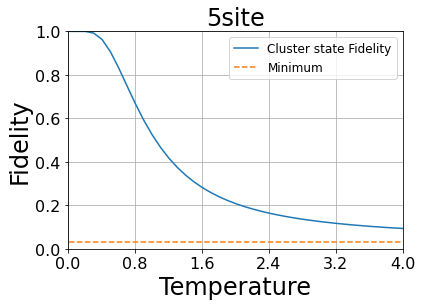

<Figure size 432x288 with 0 Axes>

In [7]:
site = 5
T = np.arange(0.01,50.1,0.1)
Min = T*0 + 1/2**(site)
Coef = (np.exp(1/T)+np.exp(-(1/T)))**site
Prob = 0
for i in range(len(Evec)):
    Prob += np.exp(Eval[i]/T)*np.dot(G,Evec[:,i])**2 
    Fid = Prob/Coef
    Fid_Clus = []
    for j in Fid:
        if j > 0.001:
            Fid_Clus.append(j)
plt.grid(True)
plt.title("5site", fontsize=24)
plt.xlabel("Temperature", fontsize=24)
plt.ylabel("Fidelity", fontsize=24)
plt.xlim(0,4.0)
plt.ylim(0,1.0)
plt.tick_params(labelsize = 16)
plt.xticks([0.0,0.8,1.6,2.4,3.2,4.0])
plt.plot(T,Fid_Clus, ls='solid', label="Cluster state Fidelity")
plt.plot(T,Min, ls='dashed', label="Minimum")
plt.legend(loc = "best", fontsize=12)
plt.show()
fig=plt.figure()

# Gate Fidelity

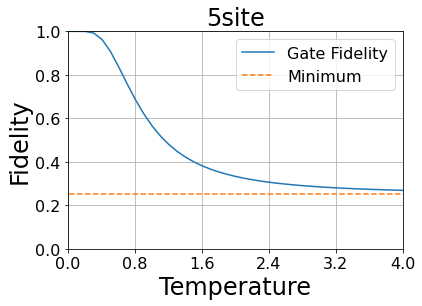

経過時間：0.1660449504852295


<Figure size 432x288 with 0 Axes>

In [8]:
t1 = time.time() 
# 処理後の時刻

site = 5
T = np.arange(0.01,4.1,0.1)
Min = T*0 + 1/4
Coef = (np.exp(1/T)+np.exp(-(1/T)))**site
K_o = np.dot(np.dot(K1,K3),K5)
K_e = np.dot(K2,K4)
Corr_o = 0
Corr_e = 0
for i in range(len(Evec)):
    Psi_o = np.dot(K_o,Evec[:,i])
    Corr_o += (np.exp(Eval[i]/T))*np.dot(Evec[:,i],Psi_o)/Coef
for i in range(len(Evec)):
    Psi_e = np.dot(K_e,Evec[:,i])
    Corr_e += (np.exp(Eval[i]/T))*np.dot(Evec[:,i],Psi_e)/Coef
GF = (1+Corr_o)*(1+Corr_e)/4
plt.grid(True)
plt.title("5site", fontsize=24)
plt.xlabel("Temperature", fontsize=24)
plt.ylabel("Fidelity", fontsize=24)
plt.xlim(0,4.0)
plt.ylim(0,1.0)
plt.xticks([0.0,0.8,1.6,2.4,3.2,4.0])
plt.tick_params(labelsize = 16)
plt.plot(T,GF, ls='solid', label="Gate Fidelity")
plt.plot(T,Min, ls='dashed', label="Minimum")
plt.legend(loc = "best", fontsize=16)
plt.show()
fig=plt.figure()

t2 = time.time()
# 経過時間を表示
elapsed_time = t2-t1
print(f"経過時間：{elapsed_time}")

# Confirmation

<ipython-input-9-cb2e1b78c3f5>:5: RuntimeWarning: divide by zero encountered in true_divide
  b=(1/a)


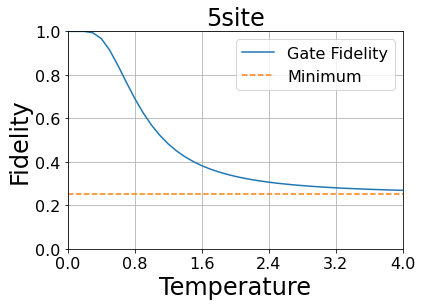

<Figure size 432x288 with 0 Axes>

In [9]:
site = 5
T=np.arange(0,50,0.1)
Min = T*0 + 1/4
a=1*T
b=(1/a)
c=np.exp(1)**(-2*b)
F5=(1+4*c**2+3*c**4)/(1+c)**site
plt.grid(True)
plt.title("5site", fontsize=24)
plt.xlabel("Temperature", fontsize=24)
plt.ylabel("Fidelity", fontsize=24)
plt.xlim(0,4.0)
plt.ylim(0,1.0)
plt.xticks([0.0,0.8,1.6,2.4,3.2,4.0])
plt.tick_params(labelsize = 16)
plt.plot(T,F5, ls='solid', label="Gate Fidelity")
plt.plot(T,Min, ls='dashed', label="Minimum")
plt.legend(loc = "best", fontsize=16)
plt.show()
fig=plt.figure()